In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
display(df)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [13]:
del df['User ID']
df['Gender']=df['Gender'].map({'Male':1,"Female":0})
display(df)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [14]:
X = df[['Gender', 'Age','EstimatedSalary']].values 
y = df['Purchased'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
X_test

array([[     1,     30,  87000],
       [     0,     38,  50000],
       [     1,     35,  75000],
       [     0,     30,  79000],
       [     0,     35,  50000],
       [     1,     27,  20000],
       [     0,     31,  15000],
       [     1,     36, 144000],
       [     0,     18,  68000],
       [     1,     47,  43000],
       [     1,     30,  49000],
       [     0,     28,  55000],
       [     1,     37,  55000],
       [     1,     39,  77000],
       [     1,     20,  86000],
       [     0,     32, 117000],
       [     1,     37,  77000],
       [     1,     19,  85000],
       [     0,     55, 130000],
       [     1,     35,  22000],
       [     0,     35,  47000],
       [     0,     47, 144000],
       [     0,     41,  51000],
       [     1,     47, 105000],
       [     0,     23,  28000],
       [     0,     49, 141000],
       [     0,     28,  87000],
       [     1,     29,  80000],
       [     0,     37,  62000],
       [     0,     32,  86000],
       [  

**Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [17]:
X_train

array([[-0.98019606,  0.58164944, -0.88670699],
       [ 1.02020406, -0.60673761,  1.46173768],
       [-0.98019606, -0.01254409, -0.5677824 ],
       [-0.98019606, -0.60673761,  1.89663484],
       [-0.98019606,  1.37390747, -1.40858358],
       [-0.98019606,  1.47293972,  0.99784738],
       [ 1.02020406,  0.08648817, -0.79972756],
       [ 1.02020406, -0.01254409, -0.24885782],
       [-0.98019606, -0.21060859, -0.5677824 ],
       [-0.98019606, -0.21060859, -0.19087153],
       [-0.98019606, -0.30964085, -1.29261101],
       [ 1.02020406, -0.30964085, -0.5677824 ],
       [ 1.02020406,  0.38358493,  0.09905991],
       [-0.98019606,  0.8787462 , -0.59677555],
       [-0.98019606,  2.06713324, -1.17663843],
       [ 1.02020406,  1.07681071, -0.13288524],
       [-0.98019606,  0.68068169,  1.78066227],
       [-0.98019606, -0.70576986,  0.56295021],
       [-0.98019606,  0.77971394,  0.35999821],
       [-0.98019606,  0.8787462 , -0.53878926],
       [ 1.02020406, -1.20093113, -1.582

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [18]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

**Step 3 | Predection**

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [20]:
logistic_regression.predict_proba(X_test)

array([[0.87943714, 0.12056286],
       [0.84745824, 0.15254176],
       [0.79219438, 0.20780562],
       [0.91949173, 0.08050827],
       [0.91193404, 0.08806596],
       [0.99168292, 0.00831708],
       [0.98663923, 0.01336077],
       [0.24871574, 0.75128426],
       [0.99494675, 0.00505325],
       [0.47116463, 0.52883537],
       [0.96152811, 0.03847189],
       [0.97412746, 0.02587254],
       [0.82795957, 0.17204043],
       [0.60900956, 0.39099044],
       [0.98361894, 0.01638106],
       [0.6875859 , 0.3124141 ],
       [0.70229903, 0.29770097],
       [0.98706858, 0.01293142],
       [0.01205309, 0.98794691],
       [0.95503232, 0.04496768],
       [0.91943567, 0.08056433],
       [0.03918315, 0.96081685],
       [0.74263653, 0.25736347],
       [0.10671587, 0.89328413],
       [0.99609335, 0.00390665],
       [0.02882025, 0.97117975],
       [0.93030086, 0.06969914],
       [0.91845387, 0.08154613],
       [0.82251383, 0.17748617],
       [0.8573546 , 0.1426454 ],
       [0.

In [21]:
logistic_regression.intercept_ 

array([-0.96121116])

In [22]:
logistic_regression.coef_

array([[0.09452625, 2.09587724, 1.11776434]])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

C:\Users\kolte\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


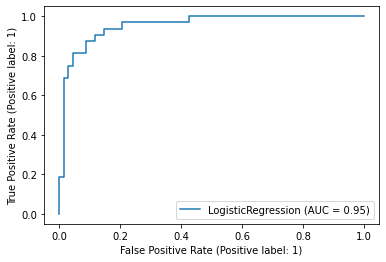

In [26]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#confusion_matrix(y_test,y_pred)
#f1_score(y_test,y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, y_test_predictions, pos_label=2)
plot_roc_curve(logistic_regression, X_test, y_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 7, 25]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

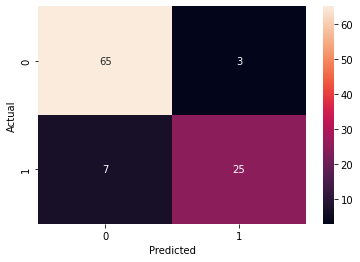

In [28]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Visualization**

In [36]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation

0.6425
Train Accuracy :  0.6425
Val Accuracy :  0.675


C:\Users\kolte\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


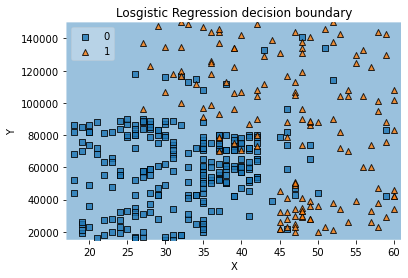

In [37]:
def logistic(data, k = 0):
  x = data[['Age','EstimatedSalary']].values
  y = data['Purchased'].values
  clf = LogisticRegression()
  clf.fit(x, y)
  print(clf.score(x,y))
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Losgistic Regression decision boundary')
  plt.show()
    
logistic(df,1)